Projeto final do curso da Mentorama

Aluno: Rodrigo Martini Riboldi

Projeto: Classificador de notícias falsas

Esse notebook tem como objetivo a realização das análises inicias no conjunto de dados utilizado neste projeto

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Importando os dados

In [3]:
df = pd.read_csv('dados/news.csv').drop(columns = 'Unnamed: 0')

In [4]:
df

,title,text,label
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...
6330,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL


# Verificando dados

In [5]:
df.label.value_counts()

REAL    3171
FAKE    3164
Name: label, dtype: int64

O dataset está bem balanceado entre notícias reais e fakes

## Verificando comportamento comum das fake news

In [6]:
df_fakes = df.loc[df.label == 'FAKE']

In [7]:
df_reals = df.loc[df.label == 'REAL']

In [8]:
from wordcloud import WordCloud, STOPWORDS

### Wordcloud de fake news

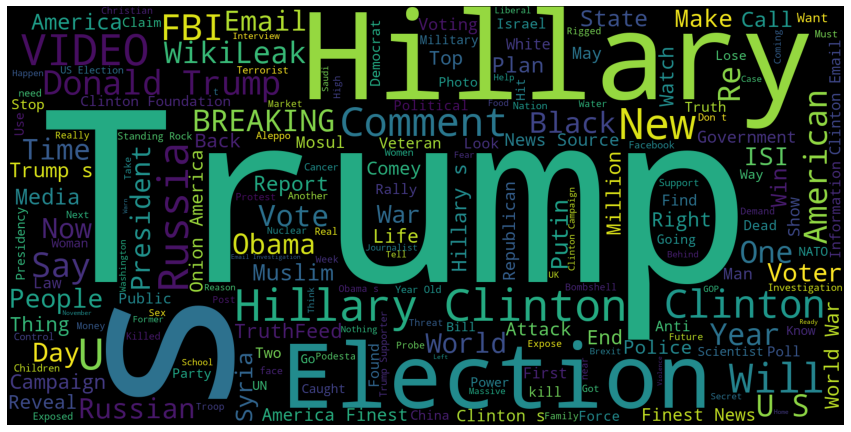

In [9]:
titles = df_fakes.title

text = " ".join(w for w in titles)

stopwords = set(STOPWORDS)

wordcloud = WordCloud(stopwords=stopwords,
                      background_color="black",
                      width=1600, height=800).generate(text)

fig, ax = plt.subplots(figsize=(15,10))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()
plt.imshow(wordcloud)

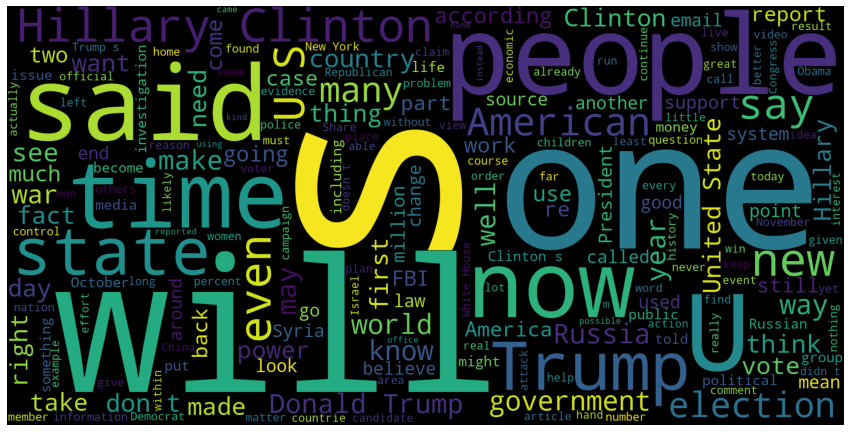

In [10]:
new = df_fakes.text

text = " ".join(w for w in new)

stopwords = set(STOPWORDS)

wordcloud = WordCloud(stopwords=stopwords,
                      background_color="black",
                      width=1600, height=800).generate(text)

fig, ax = plt.subplots(figsize=(15,10))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()
plt.imshow(wordcloud)

### Wordcloud de notícias reais

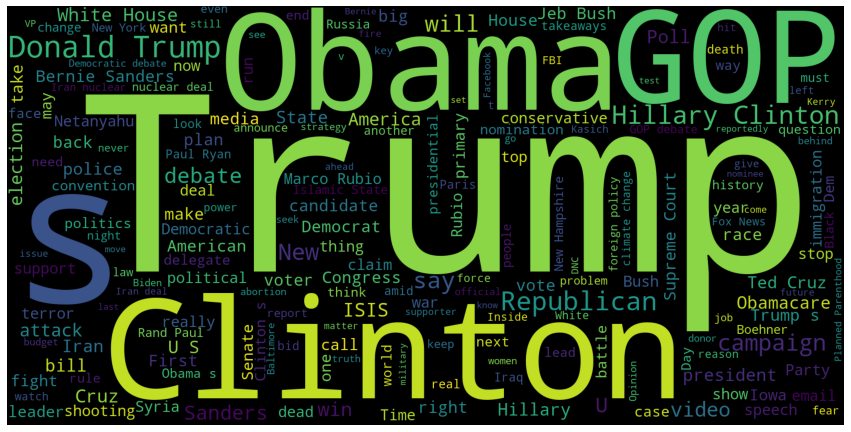

In [11]:
titles = df_reals.title

text = " ".join(w for w in titles)

stopwords = set(STOPWORDS)

wordcloud = WordCloud(stopwords=stopwords,
                      background_color="black",
                      width=1600, height=800).generate(text)

fig, ax = plt.subplots(figsize=(15,10))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()
plt.imshow(wordcloud)

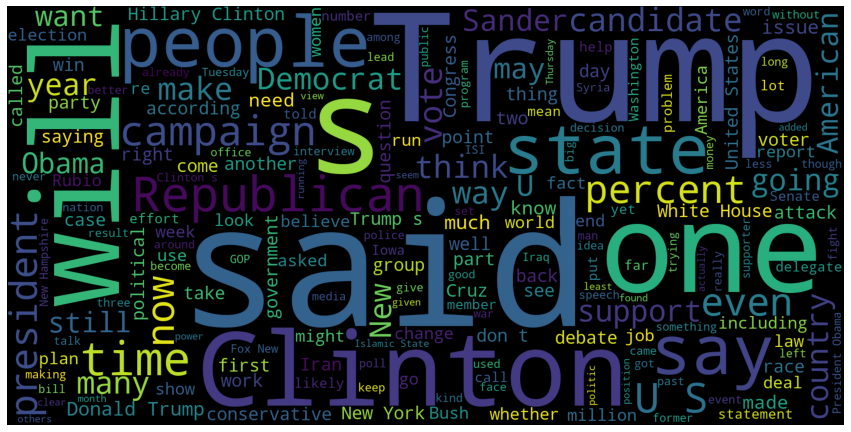

In [12]:
new = df_reals.text

text = " ".join(w for w in new)

stopwords = set(STOPWORDS)

wordcloud = WordCloud(stopwords=stopwords,
                      background_color="black",
                      width=1600, height=800).generate(text)

fig, ax = plt.subplots(figsize=(15,10))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()
plt.imshow(wordcloud)

Tanto as notícias reais como as fakes possuem conotação política e é possível perceber termos superlativos e imperativos tanto no texto como nos títulos das fake news.

Análisando as núvens de palávras é possível perceber diferenças na repetição dos termos entre as fake news e notícias reais, então é possível treinar um modelo de IA para prever se a notícia é real ou fake.

# Preparando dados para NLP

## Separando previamente um dataset para validação do modelo

In [13]:
df_validation = df.sample(frac=0.2, random_state=1)
validation_index = df_validation.index

In [14]:
df = df.drop(validation_index).reset_index(drop=True)

### Separando previamente dados de treino e teste

In [15]:
df_train = df.sample(frac=0.8, random_state=1)
train_index = df_train.index

In [16]:
df_test = df.drop(train_index).reset_index(drop=True)

In [17]:
X_train = df_train.text
y_train = df_train.label

In [18]:
X_test = df_test.text
y_test = df_test.label

# Salvando arquivos de dados e labels

In [19]:
pd.DataFrame(X_train).to_csv('dados/X_train_fake_news.csv')
pd.DataFrame(y_train).to_csv('dados/y_train_fake_news.csv')

In [20]:
pd.DataFrame(X_test).to_csv('dados/X_test_fake_news.csv')
pd.DataFrame(y_test).to_csv('dados/y_test_fake_news.csv')

# Salvando DF de validação

In [21]:
df_validation = df_validation.reset_index(drop = True)

In [22]:
df_validation.to_csv('dados/df_validation.csv')